In [1]:
# latex rendering
import matplotlib.pyplot as plt 


# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

import plot_functions as p_func
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

c_scheme = p_func.c_scheme_02()

In [2]:
# read files

fname1 = "Data/setup1/scope_0.csv"
csv_data_1 = pd.read_csv(fname1, sep=",")

fname2 = "Data/setup1/scope_1.csv"
csv_data_2 = pd.read_csv(fname2, sep=",")

# Doppler Broadened Spectrum

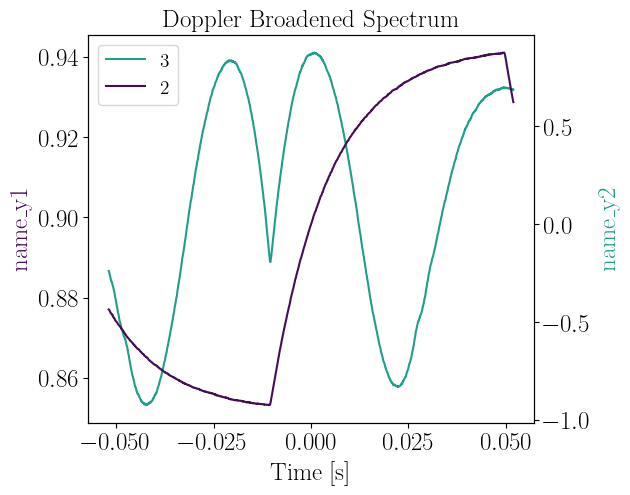

In [7]:
von1, zu1 = 0, -1

# display(np.where(csv_data_1["Volt2"].min()))

# display(help(np.where))

plot_1_LEFTAXIS = [
    [csv_data_1["second"], csv_data_1["Volt3"], "3 ", c_scheme[5], "-", ""],
]

plot_1_RIGHTAXIS = [
    [csv_data_1["second"], csv_data_1["Volt2"], "2", c_scheme[0], "-", ""],
]

p_func.plot_with_two_axes_with_N_curves_with_VERTICAL_lines(plot_1_LEFTAXIS, plot_1_RIGHTAXIS, name_x="Time [s]", name_y1="name_y1", name_y2="name_y2", col_ax1 = c_scheme[0], col_ax2= c_scheme[5], plot_title="Doppler Broadened Spectrum", filename_to_save="nopdf", marker_size="5", font_size=18, legend_size=14, legend_local="best", vlines=None, x_ticks=True)

# Doppler Free Spectrum

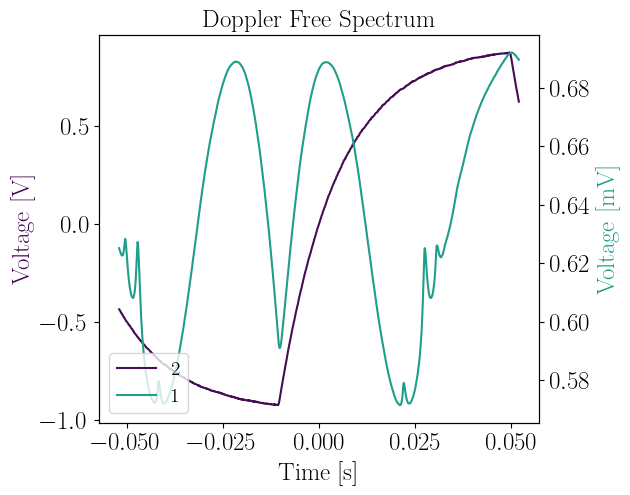

In [6]:
von2, zu2 = 0, -1

plot_2_LEFTAXIS = [
    [csv_data_2["second"], csv_data_2["Volt2"], "2 ", c_scheme[0], "-", ""],

]

plot_2_RIGHTAXIS = [
        [csv_data_2["second"], csv_data_2["Volt1"], "1", c_scheme[5], "-", ""],

]

p_func.plot_with_two_axes_with_N_curves_with_VERTICAL_lines(plot_2_LEFTAXIS, plot_2_RIGHTAXIS, name_x="Time [s]", name_y1="Voltage [V]", name_y2="Voltage [mV]", col_ax1 = c_scheme[0], col_ax2= c_scheme[5], plot_title="Doppler Free Spectrum", filename_to_save="nopdf", marker_size="5", font_size=18, legend_size=14, legend_local="lower left", vlines=None, x_ticks=True)

# Normalization

In [8]:
def normalize_to_one(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())


doppler_free_norm = normalize_to_one(csv_data_2["Volt1"])
doppler_braod_norm = normalize_to_one(csv_data_1["Volt3"])

# Doppler Free Peaks

Peaks are found by np.max on local ranges, no lorentzian performed (overkill)

times: [0.022048, 0.027508, 0.030628]
HE WILL SEND DOCUMENTATION TO ADJUST THE X-AXIS
NOTE: OUR DATA IS 'REVERSED', TAKE THAT INTO ACCOUNT WHEN FITTING


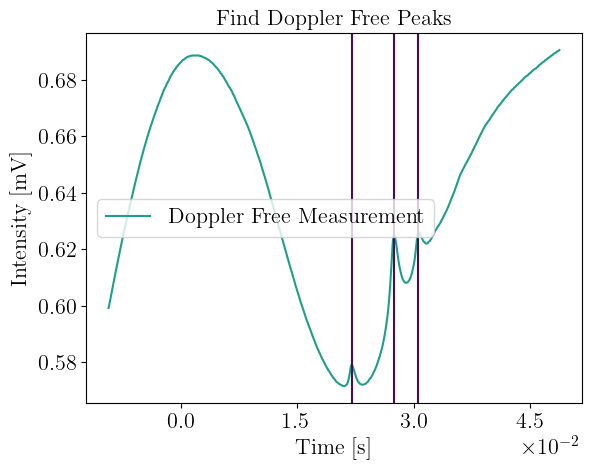

In [198]:
# data_x, data_y, label, colorr, line_style, marker_type

plot_2_get_peaks = [
        [csv_data_2["second"][von2:zu2], csv_data_2["Volt1"][von2:zu2], "Doppler Free Measurement", c_scheme[5], "-", ""],
]

# THESE VALUES ARE NOT CHOSEN WELL YET -> LORENTZIAN TOO MUCH, BUT FIND LOCAL MAXIMA
verticals = [
    [csv_data_2["second"][1424], c_scheme[0], "-"],
    [csv_data_2["second"][1529], c_scheme[0], "-"],
    [csv_data_2["second"][1589], c_scheme[0], "-"],
]

times = [csv_data_2["second"][1424], csv_data_2["second"][1529], csv_data_2["second"][1589]]
print(f"times: {times}")
print("HE WILL SEND DOCUMENTATION TO ADJUST THE X-AXIS")
print("NOTE: OUR DATA IS 'REVERSED', TAKE THAT INTO ACCOUNT WHEN FITTING")

p_func.plot_with_one_axis_with_vertical_lines(plot_2_get_peaks, name_x="Time [s]", name_y="Intensity [mV]", plot_title="Find Doppler Free Peaks", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, vlines=verticals, y_lim = None)

# Comparison

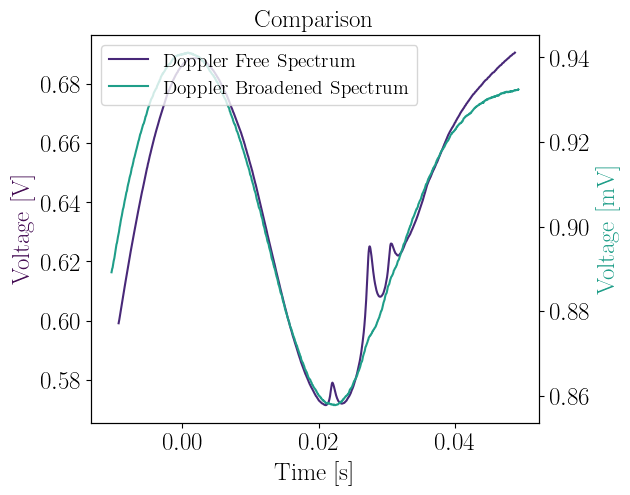

In [204]:
plot_2_LEFTAXIS = [
    [csv_data_2["second"][von2:zu2], csv_data_2["Volt1"][von2:zu2], "Doppler Free Spectrum", c_scheme[1], "-", ""],

]

plot_2_RIGHTAXIS = [
    [csv_data_1["second"][von1:zu1], csv_data_1["Volt3"][von1:zu1], "Doppler Broadened Spectrum", c_scheme[5], "-", ""],

]

p_func.plot_with_two_axes_with_N_curves_with_VERTICAL_lines(plot_2_LEFTAXIS, plot_2_RIGHTAXIS, name_x="Time [s]", name_y1="Voltage [V]", name_y2="Voltage [mV]", col_ax1 = c_scheme[0], col_ax2= c_scheme[5], plot_title="Comparison", filename_to_save="nopdf", marker_size="5", font_size=18, legend_size=14, legend_local="upper left", vlines=None, x_ticks=True)

# Normalization

In [ ]:
def normalize_to_one(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())


